In [6]:
# Import functions
import numpy as np
import matplotlib.pyplot as p
% matplotlib inline

#import lightcurves_sh
import kmeans
import mapPCA
import bin_eigenspectra
import eigencurves

from importlib import import_module
planet_name = 'HD189733b'
system = import_module('data.planet.{}'.format(planet_name))

### Fit eigencurves to the lightcurve

In [14]:
lcfile = 'data/output_lightcurves/practice1p01renorm'
spherearray = eigencurves.eigencurves(lcfile)
# spherearray is an array of wavelength

/home/jacob/mdworlds/eigencurves.py:148: ComplexWarning: Casting complex values to real discards the imaginary part
  spheres[i] += fcoeff.T[j,2*i-1]-fcoeff.T[j,2*(i-1)]


Do we need to output the full posteriors?

In [17]:
print(spherearray)

[[ 2.77000000e+03  3.50107323e-03  6.26545943e-04  2.57768410e-04
  -3.47139888e-04 -3.53361831e-05  2.70199258e-04 -1.90135495e-04
   6.71175795e-05  0.00000000e+00]
 [ 2.95000000e+03  3.14785926e-03  3.75461350e-04 -8.24911569e-05
   1.05004772e-04 -5.43599642e-06  4.95910587e-05 -4.33581788e-05
  -9.96964121e-05  0.00000000e+00]
 [ 3.31000000e+03  3.69394405e-03  9.51000440e-04  4.68853295e-04
  -3.42826872e-04 -4.40738847e-05  2.49768253e-04 -3.61938908e-04
   1.72178658e-04  0.00000000e+00]
 [ 2.59000000e+03  3.65616284e-03  8.03862142e-04  3.81261891e-04
  -3.84916600e-04 -4.78470384e-05  2.49951525e-04 -2.12586782e-04
   1.77700530e-04  0.00000000e+00]
 [ 3.13000000e+03  3.60390250e-03  8.12281442e-04  3.38859816e-04
  -2.36066510e-04 -3.91841389e-05  1.93296176e-04 -2.31383199e-04
   1.49380093e-04  0.00000000e+00]
 [ 3.67000000e+03  3.47733901e-03  8.50397113e-04  3.65742034e-04
  -1.45711244e-04 -3.85581709e-05  8.61134634e-05 -2.84578592e-04
   1.58890520e-04  0.00000000e+00

### Creat a fake data set

Fake data 1, two distince spectra

(10, 6, 4)


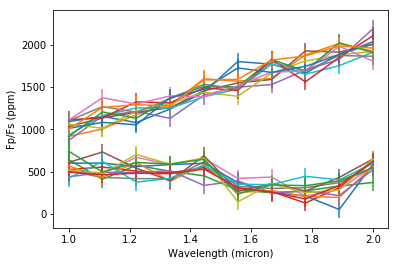

In [7]:
lamdim = 10
latdim = 6
londim = 4
ngroups = 3

# dummy flux values
waves = np.linspace(1,2,lamdim) # micron
spec1 = np.linspace(1000,2000,lamdim) # in ppm
spec2 = np.linspace(500,600,lamdim) # in ppm
spec2[lamdim//2:-1] *= 0.5

spectra1 = [[ spec1+np.random.normal(0,100,lamdim) for _ in range(latdim) ] for __ in range(londim//2)]
spectra2 = [[ spec2+np.random.normal(0,100,lamdim) for _ in range(latdim) ] for __ in range(londim//2)]
fp_grid = np.array(spectra1+spectra2).T
print(fp_grid.shape) # should be wave, lat, lon


for lat in range(latdim):
    for lon in range(londim):
        spec = fp_grid[:,lat,lon]
        err = 100 # ppm
        p.errorbar(waves, spec, err)
p.ylabel('Fp/Fs (ppm)')
p.xlabel('Wavelength (micron)')
p.show()

Fake data 2, smoothly varying spectra

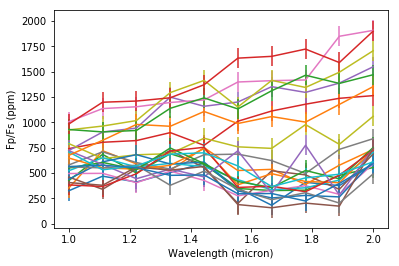

In [8]:
fp_grid2 = np.empty((lamdim,latdim,londim))
for lat in range(latdim):
    for lon in range(londim):
        f = np.random.uniform(0,1)**2
        err = np.random.normal(0,100,lamdim)
        fp_grid2[:, lat, lon] = f*spec1 + (1-f)*spec2 + err


for lat in range(latdim):
    for lon in range(londim):
        spec = fp_grid2[:,lat,lon]
        err = 100 # ppm
        p.errorbar(waves, spec, err)
p.ylabel('Fp/Fs (ppm)')
p.xlabel('Wavelength (micron)')
p.show()

### Get groups from K-means clustering

In [25]:
kgroups = kmeans.kmeans(fp_grid, ngroups)

kgroups2 = kmeans.kmeans(fp_grid2, ngroups)

### Create eigenspectra from K-mean clustering output

In [26]:
eigenspectra = bin_eigenspectra.bin_eigenspectra(fp_grid, kgroups)

eigenspectra2 = bin_eigenspectra.bin_eigenspectra(fp_grid2, kgroups2)

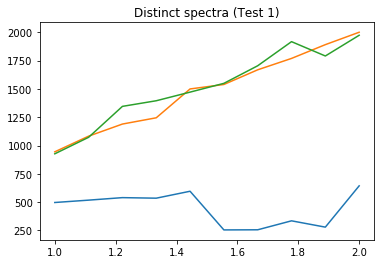

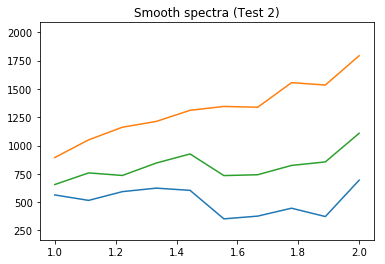

In [27]:
for spec in eigenspectra:
    p.plot(waves, spec)
p.title('Distinct spectra (Test 1)')
ylim = p.ylim()
p.show()

for spec in eigenspectra2:
    p.plot(waves, spec)
p.title('Smooth spectra (Test 2)')
p.ylim(ylim)
p.show()